# Chapter 16- Factorial ANOVA

run ANOVA with multiple input variables

## Factorial ANOVA 1: balanced designed, no interactions

factorial designs: more than one grouping variable

take the clinical trail example: What if therapy actually does have an effect on mood gain but it's 'hidden' by the effect of the drug? 

Run an analysis using both drug and therapy as predictors. 

Each person- crocss classify by drug (3 levels) and therapy (2 levels): 3x2 factorial design

In [1]:
load("clinicaltrial.Rdata")

In [2]:
xtabs(~drug+therapy, clin.trial)

          therapy
drug       no.therapy CBT
  placebo           3   3
  anxifree          3   3
  joyzepam          3   3

**What hypothesis are we testing?**

there are a bunch of different means that we're interested in

group means of all possible combinations of the two factors:

In [3]:
aggregate(mood.gain~drug+therapy, clin.trial, mean)

drug,therapy,mood.gain
placebo,no.therapy,0.300000
anxifree,no.therapy,0.400000
joyzepam,no.therapy,1.466667
placebo,CBT,0.600000
anxifree,CBT,1.033333
joyzepam,CBT,1.500000


Group means that ignore one of the factors:

In [4]:
aggregate(mood.gain~drug, clin.trial, mean)

drug,mood.gain
placebo,0.4500000
anxifree,0.7166667
joyzepam,1.4833333


In [5]:
aggregate(mood.gain~therapy, clin.trial, mean)

therapy,mood.gain
no.therapy,0.7222222
CBT,1.0444444


In [6]:
mean(clin.trial$mood.gain)

[1] 0.8833333

12 different means to keep track of 

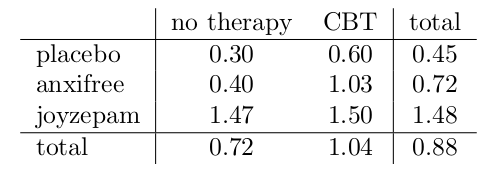

12 sample statistics that we can use to estimate different population means. 

R = num rows, C = num cols. This is a RxC (3x2) factorial ANOVA

mean $\mu_{rc}$ corresponds to the $r$th level of factor A (row r) and the $c$th level of factor B (column c)

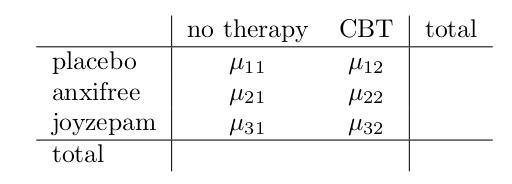

remaining entries: marginal means. use a '.'

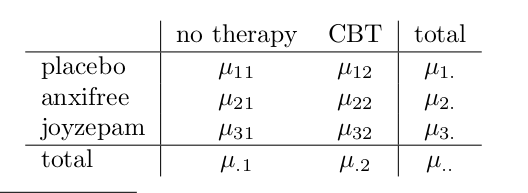

Questions: Does the choice of drug have any effect on mood and does CBT have any effect on mood?

If the drug has no effect, we should expect the row means to be identical

$$
H_0: \text{row means are the same: } \mu_{1.} = \mu_{2.} = \mu_{3.}
$$
$$
H_1: \text{at least one row mean is different}
$$

second hypothesis:
$$
H_0: \text{column means are the same: } \mu_{.1} = \mu_{.2}
$$
$$
H_1: \text{column means are different: } \mu_{.1} \neq \mu_{.2}
$$

These are exactly the same as the one-way ANOVA, but things are a little more complicated because we have to account for multiple grouping variables

**Running the analysis in R**

take a look at the original analysis with a single factor

In [7]:
model.1 <- aov(mood.gain ~ drug, clin.trial)
print(summary(model.1))

            Df Sum Sq Mean Sq F value   Pr(>F)    
drug         2  3.453  1.7267   18.61 8.65e-05 ***
Residuals   15  1.392  0.0928                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Does therapy have any realationship to mood.gain?

In [8]:
model.2 <- aov(mood.gain~drug+therapy, clin.trial)
print(summary(model.2))

            Df Sum Sq Mean Sq F value   Pr(>F)    
drug         2  3.453  1.7267  26.149 1.87e-05 ***
therapy      1  0.467  0.4672   7.076   0.0187 *  
Residuals   14  0.924  0.0660                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


This tells us that there are 2 main effects of drug and therapy. 

Later on: interactions between factors

**How are the sum of squares calculated?**

Notation for means / marginal means

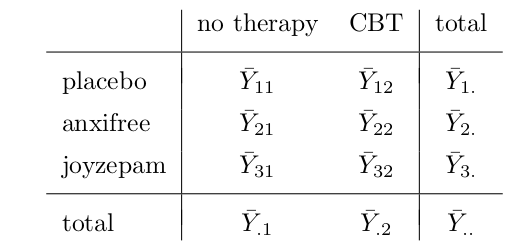!

To get sum of squares for each factor:

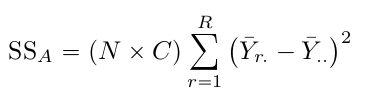

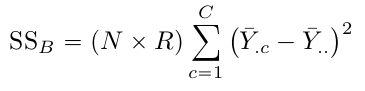



calculate means

In [9]:
drug.means <- aggregate(mood.gain~drug, clin.trial, mean)[,2]
therapy.means <- aggregate(mood.gain~therapy, clin.trial, mean)[,2]
grand.mean<- mean(clin.trial$mood.gain)

In [10]:
drug.means

[1] 0.4500000 0.7166667 1.4833333

In [11]:
therapy.means

[1] 0.7222222 1.0444444

In [12]:
grand.mean

[1] 0.8833333

calculate each sum of squares for drug

In [13]:
SS.drug <- (3*2) * sum( (drug.means-grand.mean)^2 )
SS.drug

[1] 3.453333

therapy means

In [14]:
SS.therapy <- (3*3) * sum( (therapy.means-grand.mean)^2 )
SS.therapy

[1] 0.4672222

analogous to between-groups SS

also need within-group SS (aka residual sum of squares- variation after you take into account the differences in marginal means). 

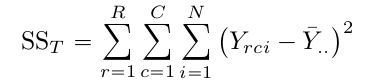

$SS_R$ is the variation that cannot be explained by either of the factors, so:
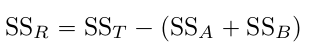

Note: $SS_A + SS_B$ is sometimes called the variance attributable to the 'ANOVA model'

In [15]:
SS.tot <- sum( (clin.trial$mood.gain - grand.mean)^2 )
SS.tot

[1] 4.845

In [16]:
SS.res <- SS.tot - (SS.drug + SS.therapy)
SS.res

[1] 0.9244444

**What are our degrees of freedom?**

for any factor, dof = num levels - 1

dof = number of quantities observed - number of constraints

drugs: 3 group means constrained by 1 grand mean

residuals: 18 observations, constraints = 1 grand mean, 2 group means that drug introduces, and 1  group mean that therapy introduces (so $N-R-C+1$)

**Factorial ANOVA versus one-way ANOVAs**

We got the same sum of squares and dof when we did one-way ANOVA, but the one-way did not give significant results. 

The difference is the residuals. The one-way ANOVA dumped all the variation due to drug into the residuals and treated it as random variation, making it look more noisy. 

**What kinds of outcomes does this analysis capture?**

4 possibilities:

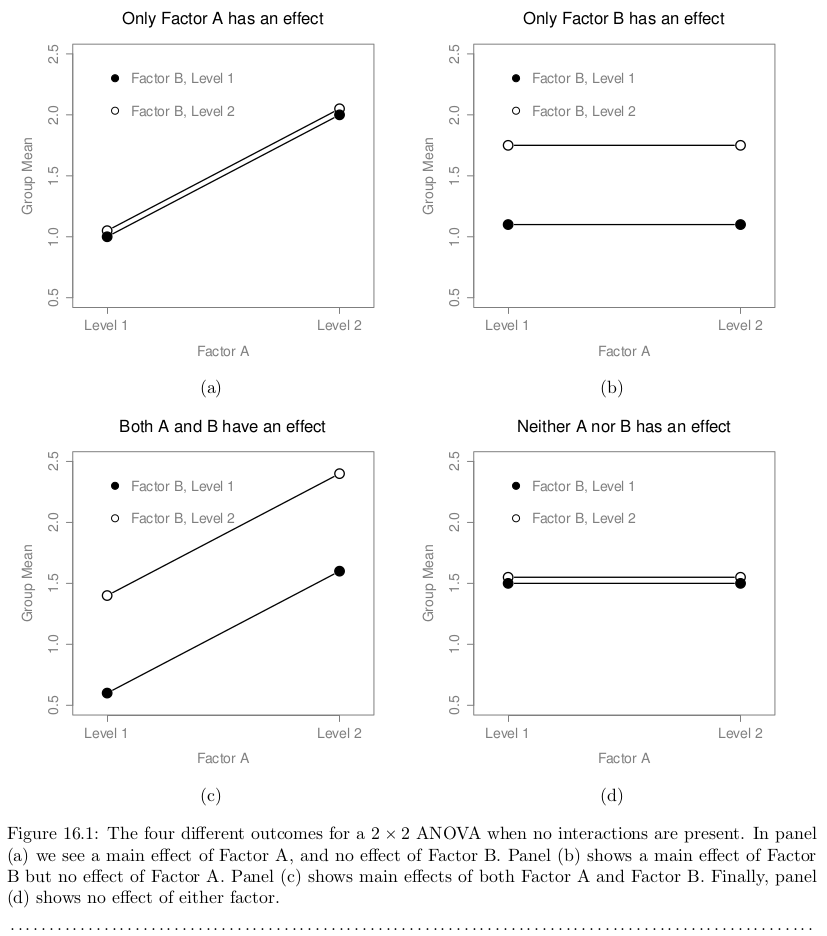

## Factorial ANOVA 2: balanced designes, interactions allowed

The ANOVA model we have does not fully account for group means becuase we haven't addressed the possibility of interaction between the two factors. 

interaction: The effect of Factor A is different depending on which level of Factor B you're talking about (e.g. one drug may be much more effective when administered with therapy)

Interaction effects:

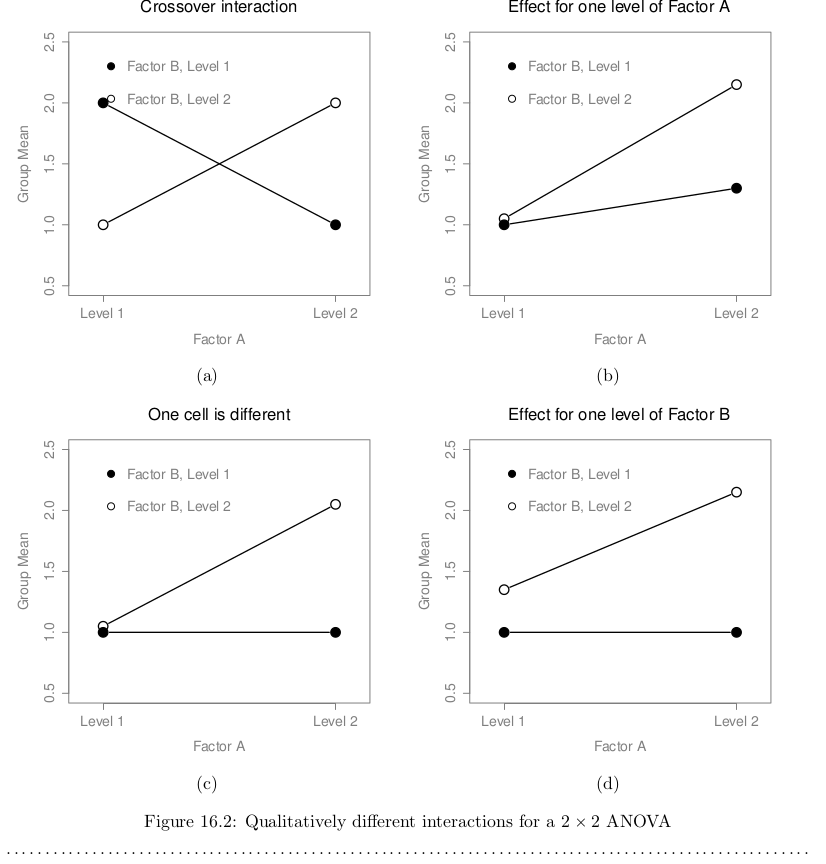

Note: sciplots not available for the version of R that I currently have installed

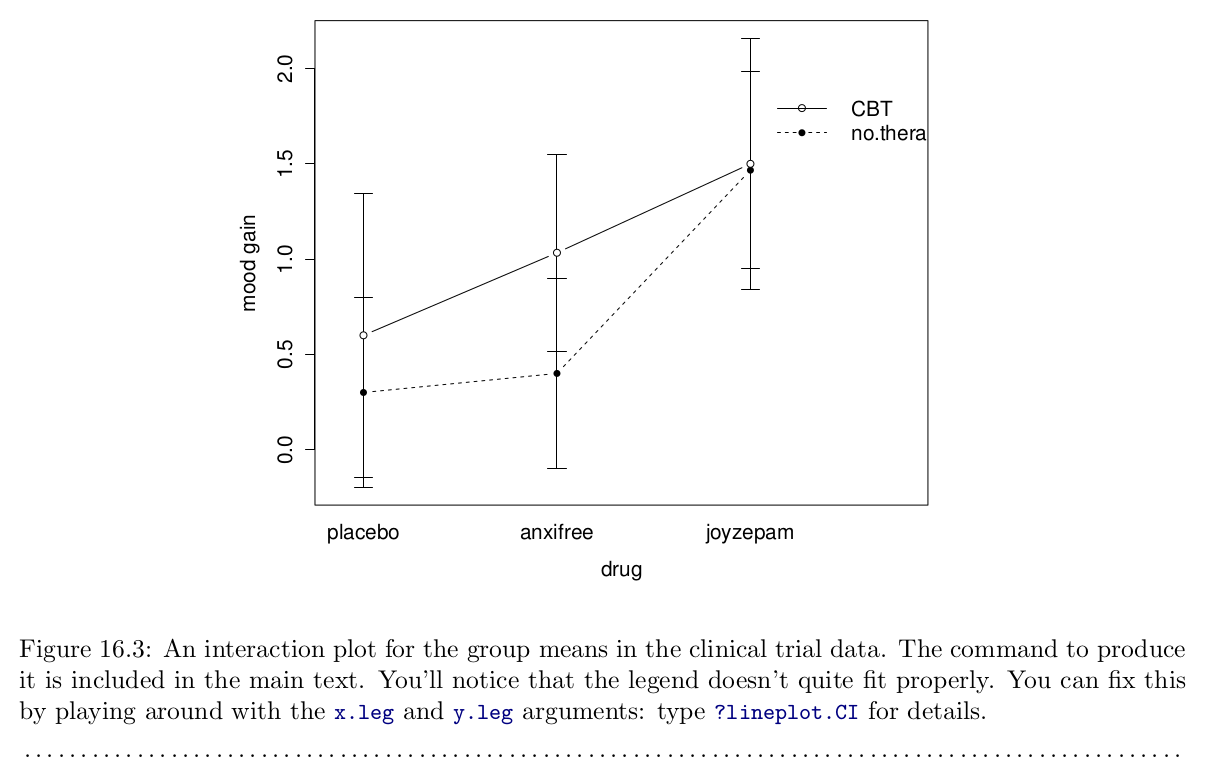

joyzepam appears effective regardless of whether or not CBT was used- but is the large change with anxifree real or just due to chance? 

**What exactly is an interaction effect?**

3 terms: drug, therapy, drug:therapy

How we formalize that into hypotheses are a little complicated

define the effect of Factor A at level r to be equal to the difference between the marginal mean and teh grand mean.

$$
\alpha_r = \mu_{r.} - \mu_{..}
$$

all of $\alpha_r$ must sum to 0. same reason that the average of the marginal means much be the grand mean.

factor B at level c:

$$
\beta_c = \mu_{.c} - \mu_{..}
$$

If there is no interaction effect (null):
$$
\mu_{rc} = \mu_{..} + \alpha_r + \beta_c
$$

If there is interaction effects
$$
\mu_{rc} \neq \mu_{..} + \alpha_r + \beta_c
$$
(for at least one rc group)

usually written as 
$$
\mu_{rc} = \mu_{..} + \alpha_r + \beta_c + (\alpha \beta)_{rc}
$$
where $(\alpha \beta)_{rc}$ is nonzero for at least one group

**Calculating sums of squares for the interaction**

estimate main effects:
$$
\hat \alpha_r = \bar Y_{r.} - \bar Y_{..}
$$

$$
\hat \beta_c = \bar Y_{.c} - \bar Y_{..}
$$

do some re-arranging to get the sum of squares terms

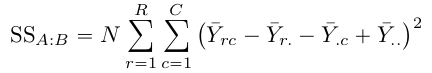

now get residual sum of squares:



This will be smaller than in the original ANOVA that doesn't handle interactions

**Degrees of freedom for the interaction**

RxC quantities of interest. One constraint: all group means need to average to grand mean.

main effect of factor A has R-1 dof, main effect of factor B has C-1 dof so:

$$
df_{A:B} = (R \times C - 1) - (R-1) - (C-1) = (R-1)(C-1)
$$

residual dof: $N-(R \times C)$


**Running the ANOVA in R**

In [17]:
model.3 <- aov(mood.gain~drug+therapy+drug:therapy, clin.trial)

shorthand: use * to indicate both main effects and interaction

In [18]:
model.3 <- aov(mood.gain~drug*therapy, clin.trial)
print(summary(model.3))

             Df Sum Sq Mean Sq F value   Pr(>F)    
drug          2  3.453  1.7267  31.714 1.62e-05 ***
therapy       1  0.467  0.4672   8.582   0.0126 *  
drug:therapy  2  0.271  0.1356   2.490   0.1246    
Residuals    12  0.653  0.0544                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


There is no significant interaction between drug and therapy

**Interpreting the results**

- the fact that there's an interaction doesn't tell you what kind of interaction exists
- issues arise when there is a significant interaction but no main effect (e.g. crossover interaction). general advice: don't pay much attention to the main effects when an interaction is present becuase the main effects usually aren't interesting in that situation. 

## Effect size, estimated means, and confidence intervals

**Effect sizes**

Effect size for factor A:

$$
\eta_A^2 = \frac{\text{SS}_A}{\text{SS}_T}
$$

proportion of variance in the outcome variable that can be accounted for by the main effect in factor A. (0 to 1)

sum of $\eta^2$ sums to the total $R^2$


partial effect size: deliberately ignore the other effects in the model (e.g. main effect of factor B)

$$
\text{partial} \eta^2_A = \frac{\text{SS}_A}{\text{SS}_A + \text{SS}_R}
$$

not comparable across terms- this is just effect size relative to residual variation

In [19]:
library(lsr)
etaSquared(model.2)

,eta.sq,eta.sq.part
drug,0.7127623,0.7888325
therapy,0.0964339,0.3357285


implies large effect of drug, modest effect of therapy

If you did the experiment while only changing factor A, partial eta squared tells you about how much of the variance in the outcome variable you would expect to see accounted for in the experiment. 

In [20]:
etaSquared(model.3)

,eta.sq,eta.sq.part
drug,0.71276230,0.8409091
therapy,0.09643390,0.4169559
drug:therapy,0.05595689,0.2932692


**Estimated group means**
report estimate of goup means based on ANOVA and associated CIs. 

In [21]:
install.packages('effects')

also installing the dependencies ‘nloptr’, ‘lme4’


Warning message in install.packages("effects"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("effects"):
“installation of package ‘lme4’ had non-zero exit status”
Warning message in install.packages("effects"):
“installation of package ‘effects’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [22]:
library(effects)
eff <- effect(term='drug*therapy', mod=model.3)
print(eff)

ERROR: Error in library(effects): there is no package called ‘effects’


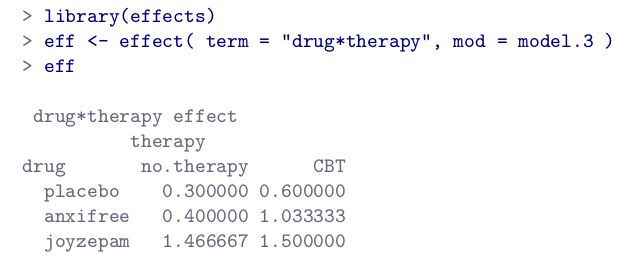



## Assumption checking

key assumptions:

- homogeneity of variance
- normality of residuals
- independence of observations

**Levene test for homogeneity of variance**

(see section on one-way ANOVA)

**Normality of residuals**

In [ ]:
resid <- residuals(model.2)
hist(resid)

In [ ]:
qqnorm(resid)

In [ ]:
shapiro.test(resid)

## The F-test as a model comparison

look for a single test that jointly checks the main effect of therapy and the interaction effect. 

F-test is really a comparison of two models: full model (alternative) and simpler model missing one or more terms (null). 

**The F test comparing 2 models**

full model: 
$$
Y \sim A+B+C+D
$$

null model:
$$
Y \sim A + B
$$


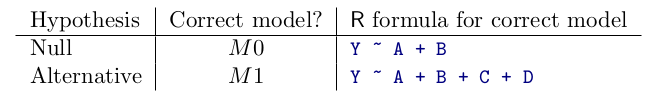

fundamental rule: total variability = variability from model + leftovers

or:
$$
\text{SS}_M = \text{SS}_T + \text{SS}_R
$$

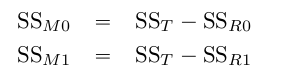

we are interested in the difference between full and null model

define SS associated with the difference:

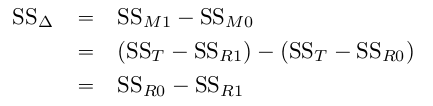

now get mean squared for differences and full model

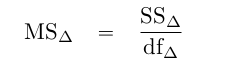

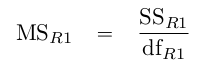

Now get the F-statistic

$$
F = \frac{\text{MS}_{\delta}}{\text{MS}_{R1}}
$$

**Running the test in R**

In [ ]:
anova(model.1, model.3)

## ANOVA as a linear model

linear model:
$$
Y_p = b_1 X_{1p} + b_2 X_{2p} + b_0 + \epsilon_p
$$

$$
\hat Y_p = b_1 X_{1p} + b_2 X_{2p} + b_0
$$

$\hat Y_p$ is the value of Y that the regression line predicts for person p, compared to the actual value of $Y_p$

We can write ANOVA as a linear model. 

let's rewrite a 2x2 factorial ANOVA as a linear model

**Some data**

grades dataframe:

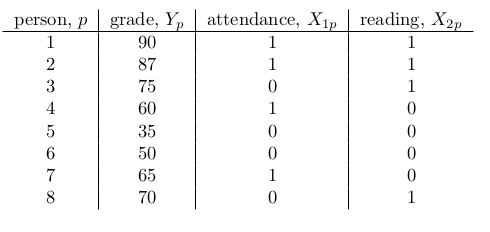

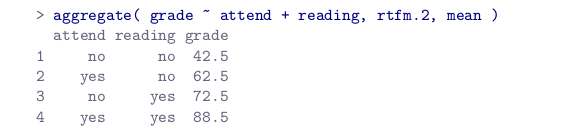

**ANOVA with binary factors as a regression model**

data is in 3 variables: Y (continuous), and 2 binary variables (X1, X2)

2x2 factorial ANOVA is *exactly* equivalent to 

$$
Y_p = b_1 X_{1p} + b_2 X_{2p} + b_0 + \epsilon_p
$$

same as a two-predictor regression model, but independent variables are now binary variables. 

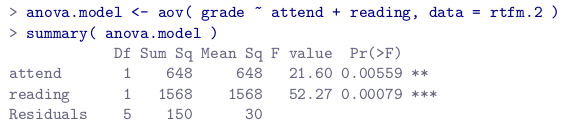

results of anova model:<br> 
- higher grade if they attened class p=0.0056
- higher grade if they read book, p=0.0008

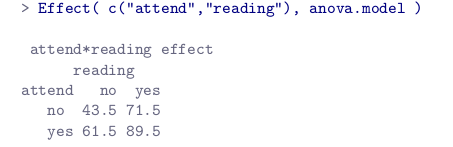

When encoding theses binary variables in a regression model:
- if coef for attent > 0, then students that attend the lecture get higher grades
- same for reading

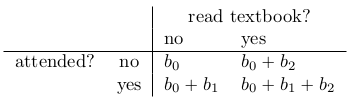

These numbers come out exactly the same as a 2x2 ANOVA

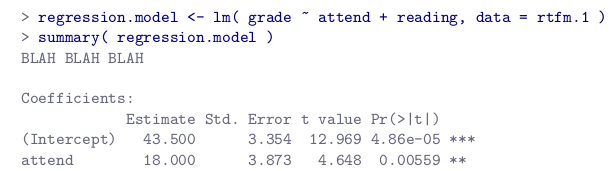
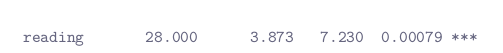

These correspond to the predicted group means from ANOVA<br> 

also, p-values for coefficients are exactly the same

**Changing the baseline category**

can switch no's and yes's- switches the sign of all coefficients

**How to encode non binary factors as contrasts**

- a 3-level factor can be a redescribed as 2 binary variables

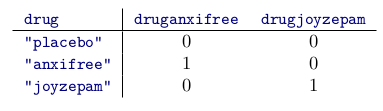

In [24]:
druganxifree <- as.numeric(clin.trial$drug == "anxifree")
druganxifree

[1] 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0

In [28]:
clin.trial.2 <- expandFactors(clin.trial)
clin.trial.2

   (Intercept) druganxifree drugjoyzepam therapyCBT mood.gain
1            1            0            0          0       0.5
2            1            0            0          0       0.3
3            1            0            0          0       0.1
4            1            1            0          0       0.6
5            1            1            0          0       0.4
6            1            1            0          0       0.2
7            1            0            1          0       1.4
8            1            0            1          0       1.7
9            1            0            1          0       1.3
10           1            0            0          1       0.6
11           1            0            0          1       0.9
12           1            0            0          1       0.3
13           1            1            0          1       1.1
14           1            1            0          1       0.8
15           1            1            0          1       1.2
16      

druganxifree,drugjoyzepam,therapyCBT,mood.gain
0,0,0,0.5
0,0,0,0.3
0,0,0,0.1
1,0,0,0.6
1,0,0,0.4
1,0,0,0.2
0,1,0,1.4
0,1,0,1.7
0,1,0,1.3
0,0,1,0.6


**The equivalence between ANOVA and regression for non-binary factors**

In [29]:
drug.anova <- aov(mood.gain ~ drug + therapy, clin.trial)
summary( drug.anova )

            Df Sum Sq Mean Sq F value   Pr(>F)    
drug         2  3.453  1.7267  26.149 1.87e-05 ***
therapy      1  0.467  0.4672   7.076   0.0187 *  
Residuals   14  0.924  0.0660                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [30]:
drug.regression <- lm( mood.gain ~ druganxifree + drugjoyzepam + therapyCBT, clin.trial.2)
summary( drug.regression )


Call:
lm(formula = mood.gain ~ druganxifree + drugjoyzepam + therapyCBT, 
    data = clin.trial.2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3556 -0.1806  0.0000  0.1972  0.3778 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.2889     0.1211   2.385   0.0318 *  
druganxifree   0.2667     0.1484   1.797   0.0939 .  
drugjoyzepam   1.0333     0.1484   6.965  6.6e-06 ***
therapyCBT     0.3222     0.1211   2.660   0.0187 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.257 on 14 degrees of freedom
Multiple R-squared:  0.8092,	Adjusted R-squared:  0.7683 
F-statistic: 19.79 on 3 and 14 DF,  p-value: 2.64e-05


get R to do an 'omnibus' test- lumping in the drug-related factors (i.e. an F-test

In [31]:
nodrug.regression <- lm( mood.gain~therapyCBT, clin.trial.2 )
anova( nodrug.regression, drug.regression)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
16,4.3777778,NA,NA,NA,NA
14,0.9244444,2,3.453333,26.14904,1.872362e-05


**Degrees of freedom as parameter counting!**

Degrees of freedom - defined in terms of number of parameters that have to be estimated. <br> 

regression model or ANOVA: dof = number of regression coefficients + intercept

for an F-test, first dof = difference in num parameters. second dof = dof associated with residuals: how many more numbers do we need to perfectly describe the data? num_sample - num_coefficients - 1

**A postscript**

In [32]:
drug.lm <- lm( mood.gain ~ drug + therapy, clin.trial)

Important: always ensure that factor variables are declared as such

In [33]:
summary( drug.lm )


Call:
lm(formula = mood.gain ~ drug + therapy, data = clin.trial)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.3556 -0.1806  0.0000  0.1972  0.3778 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.2889     0.1211   2.385   0.0318 *  
druganxifree   0.2667     0.1484   1.797   0.0939 .  
drugjoyzepam   1.0333     0.1484   6.965  6.6e-06 ***
therapyCBT     0.3222     0.1211   2.660   0.0187 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.257 on 14 degrees of freedom
Multiple R-squared:  0.8092,	Adjusted R-squared:  0.7683 
F-statistic: 19.79 on 3 and 14 DF,  p-value: 2.64e-05


In [34]:
anova( drug.lm )

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
drug,2,3.4533333,1.72666667,26.149038,1.872362e-05
therapy,1,0.4672222,0.46722222,7.075721,1.866024e-02
Residuals,14,0.9244444,0.06603175,NA,NA


## Different ways to specify contrasts

contrast matrix

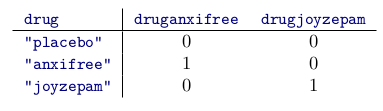

**Treatment contrasts**

one row is special, treated as baseline / control / placebo

In [35]:
contr.treatment(n=5)

2,3,4,5
0,0,0,0
1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1


**Helmert contrasts**

compare each group to the mean of the previous ones. 

1st contrast = difference between goup 2 and group 1

In [36]:
contr.helmert(n=5)

-1,-1,-1,-1
1,-1,-1,-1
0,2,-1,-1
0,0,3,-1
0,0,0,4


- every contrast (column) sums to 0
- when doing ANOVA, intercept terms corresponds to grand mean
- treatment contrast: intercept = group mean for baseline

**Sum to zero contrasts**

- pairwise comparisons
- each contrast encodes the difference between one of the groups and the baseline category

In [37]:
contr.sum(n=5)

1,0,0,0
0,1,0,0
0,0,1,0
0,0,0,1
-1,-1,-1,-1


each contrast is a pairwise comparison between group 5 and the other 4 groups

**Viewing and setting the default contrasts in R**

- each factor variable in R has some kind of contrast matrix associated with it

In [38]:
attr( clin.trial$drug, "contrasts")

NULL

In [39]:
contrasts(clin.trial$drug)

,anxifree,joyzepam
placebo,0,0
anxifree,1,0
joyzepam,0,1


In [40]:
options("contrasts")

$contrasts
        unordered           ordered 
"contr.treatment"      "contr.poly"

In [41]:
options(contrasts=c("contr.helmert", "contr.poly"))

In [42]:
options("contrasts")

$contrasts
[1] "contr.helmert" "contr.poly"

In [43]:
contrasts(clin.trial$drug)

placebo,-1,-1
anxifree,1,-1
joyzepam,0,2


In [44]:
options(contrasts = c("contr.treatment", "contr.poly"))

**Setting the contrasts for a single factor**

In [45]:
contrasts(clin.trial$drug) <- contr.sum(3)
contrasts(clin.trial$drug)

placebo,1,0
anxifree,0,1
joyzepam,-1,-1


**Setting the contrasts for a single analysis**

In [46]:
my.contrasts <- list(drug=contr.helmert, therapy=contr.helmert)

In [47]:
mod <- aov(mood.gain ~ drug*therapy, clin.trial, contrasts=my.contrasts)

In [48]:
mod$contrasts

$drug
         [,1] [,2]
placebo    -1   -1
anxifree    1   -1
joyzepam    0    2

$therapy
           [,1]
no.therapy   -1
CBT           1

## Post hoc tests

## The method of planned comparisons